<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

Prediction of House Price Using Linear Regression

# Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [78]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

%matplotlib inline

## Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [43]:
# Read CSV
house_csv = "../DATA/Sacramento_transactions.csv"

In [44]:
# Data Types
# Hint: Look into the columns zip, sale_date & beds

house = pd.read_csv(house_csv)

In [45]:
house.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [12]:
house.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [47]:
# Feature Engineering (create a new cloumn)
house['price/sqft'] = house['price']/house['sq__ft']

In [49]:
# Perform EDA
house.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,price/sqft
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,70.839713
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,58.450728
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,86.532663
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,81.346244
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,102.760351


In [50]:
house.shape

(985, 13)

In [51]:
house.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude', 'price/sqft'],
      dtype='object')

In [52]:
house.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude,price/sqft
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982,inf
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278,NaN
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704,0.343525
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127,114.142628
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220,149.253731
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778,213.178295
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599,inf


# Predict Price

We are going to predict `price` from available information.

## What is the Target Variable? Why?

In [54]:
# ANSWER
#Target Variable is Price, becasue we are predicting price. 

## List all possible variables which might be Predictor variable.

In [55]:
# ANSWER
#'street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type', 'sale_date', 'latitude', 'longitude', 'price/sqft'

## Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [56]:
# ANSWER
house.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude,price/sqft
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904,-0.184373
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993,-0.126587
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582,-0.059380
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742,-0.064329
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485,0.600180
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925,0.167303
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000,0.227033
price/sqft,-0.184373,-0.126587,-0.059380,-0.064329,0.600180,0.167303,0.227033,1.000000


## What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [57]:
# ANSWER
house['price'].median()

213750.0

## Find Residuals

Find difference between actual value and predicted value. Use absolute value.

In [58]:
# ANSWER
median = house['price'].median()
house['result'] = house['price'] - median

In [59]:
house['price'] - median

0     -154528.0
1     -145538.0
2     -144870.0
3     -144443.0
4     -131850.0
         ...   
980     18675.0
981     20250.0
982     21250.0
983     21551.0
984     21988.0
Name: price, Length: 985, dtype: float64

In [60]:
house.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,price/sqft,result
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,70.839713,-154528.0
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,58.450728,-145538.0
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,86.532663,-144870.0
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,81.346244,-144443.0
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,102.760351,-131850.0


## Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

$$\hat{y} = \beta_0 + \beta_1 x$$

where

> $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$
- $s_Y$ : the sample standard deviation of observed values $Y$
- $s_X$ : the sample standard deviation of observed values $X$
- $r_{XY}$ : the sample Pearson correlation coefficient between observed $X$ and $Y$

### Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [61]:
# ANSWER
y = house['price']
x = house['baths']

y

0       59222
1       68212
2       68880
3       69307
4       81900
        ...  
980    232425
981    234000
982    235000
983    235301
984    235738
Name: price, Length: 985, dtype: int64

### Calculate beta_1

$$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [37]:
y_mean = y.mean()
y_mean

234144.26395939087

In [38]:
x_mean = x.mean()
x_mean

1.7766497461928934

In [64]:
beta1 =sum((y - y_mean)*(x - x_mean))/sum((x - x_mean)**2)

In [65]:
beta1

64318.53523673409

### Calculate beta_0

$$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [66]:
# ANSWER
beta0 = y_mean - beta1 * x_mean

In [67]:
beta0

119872.75465554858

### Find Yhat (Predicted Value Using Beta 0 and Beta 1)

$$\hat{y} = \beta_0 + \beta_1 x$$

In [68]:
# ANSWER
yhat = beta0 + beta1 * x

In [102]:
house['yhat'] = yhat

In [69]:
yhat

0      184191.289892
1      184191.289892
2      184191.289892
3      184191.289892
4      184191.289892
           ...      
980    312828.360366
981    248509.825129
982    248509.825129
983    248509.825129
984    248509.825129
Name: baths, Length: 985, dtype: float64

### Find Residuals

$$ \text{residual}_i = y_i - \hat{y}_i$$

In [70]:
# ANSWER
residual = y - yhat

In [71]:
residual

0     -124969.289892
1     -115979.289892
2     -115311.289892
3     -114884.289892
4     -102291.289892
           ...      
980    -80403.360366
981    -14509.825129
982    -13509.825129
983    -13208.825129
984    -12771.825129
Length: 985, dtype: float64

### Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

$$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

$$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

$$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [72]:
# ANSWER
sstot=sum((y-y_mean)**2)
sstot

18838783738865.387

In [74]:
ssres=sum((y-yhat)**2)
ssres

15575357155318.648

In [76]:
r2=1-(ssres/sstot)
r2

0.17322915474708278

### [BONUS] Draw Plot of Predicted Line

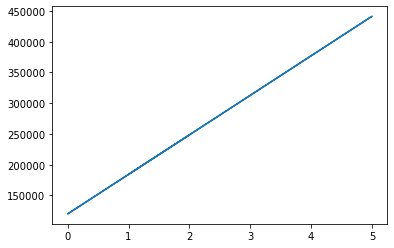

In [100]:
plt.plot(x,yhat)

### [BONUS] Draw Plot of Predicted Line With Residuals

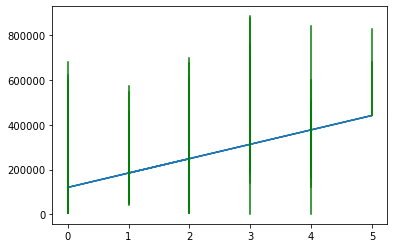

In [103]:
# ANSWER
plt.plot(x,yhat)
for _, row in house.iterrows():
    plt.plot((row['baths'], row['baths']), (row['price'], row['yhat']), 'g-')

### Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [104]:
# ANSWER
house_predict = beta0 + beta1 * 2

In [105]:
house_predict

248509.82512901677

## Find Coefficient and Intercept using Linear SKLearn Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

In [109]:
from sklearn.linear_model import LinearRegression

In [111]:
linreg = LinearRegression()

In [116]:
# ANSWER
y = house['price']
x = house[['baths']]

In [117]:
linreg.fit(x,y)

LinearRegression()

In [118]:
linreg.coef_

array([64318.53523673])

In [119]:
linreg.intercept_

119872.75465554738

### Find R Score

In [120]:
linreg.score(x,y)

0.17322915474708311

# Splitting Data

In [122]:
# ANSWER
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

## Create training and testing subsets

Hint: Using `train_test_split` Library

## Check Shape, Sample of Test Train Data

In [124]:
# ANSWER
linreg.fit

<bound method LinearRegression.fit of LinearRegression()>

In [126]:
X_test.shape

(197, 1)

In [129]:
X_test.sample()

,baths
377,1


In [127]:
X_train.shape

(788, 1)

## Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using x_test, y_test

In [130]:
# ANSWER
linreg.fit(X_train, y_train)

LinearRegression()

In [132]:
linreg.score(X_test, y_test)

0.05740003602266874

## Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

What is the predicted value of that house?

In [135]:
# ANSWER
linreg.predict([[2]])

array([247135.06423101])

## Find the error

In [137]:
# ANSWER
#Residual
linreg.predict(X_test) - y_test

613     99447.436116
451    152510.320461
731      6164.064231
436     96822.692346
275    -46857.935769
           ...      
292   -157552.563884
209     79135.064231
506    -98610.935769
49      79135.064231
717     25135.064231
Name: price, Length: 197, dtype: float64